                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231

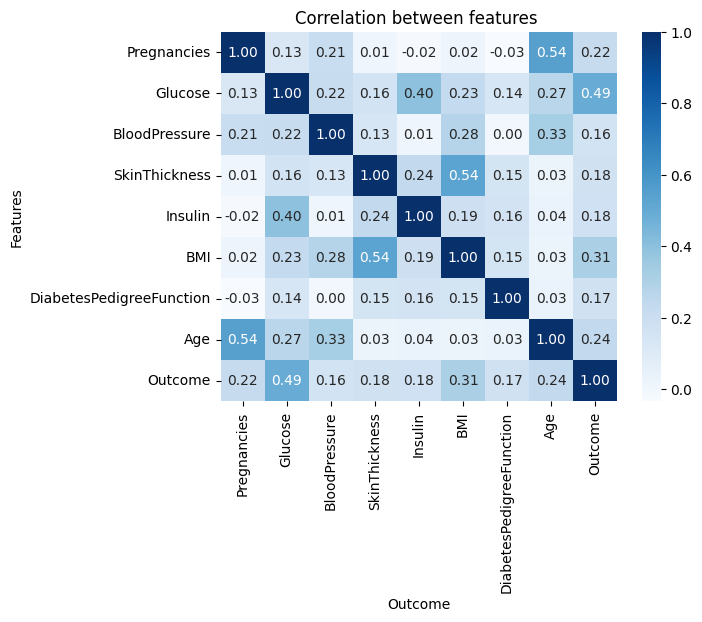

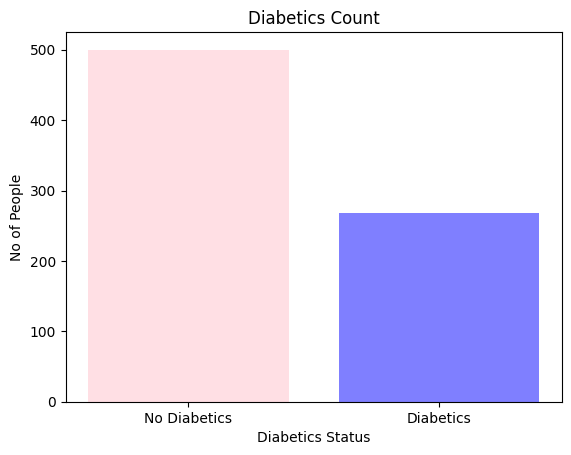

Accuracy % : 74.02597402597402


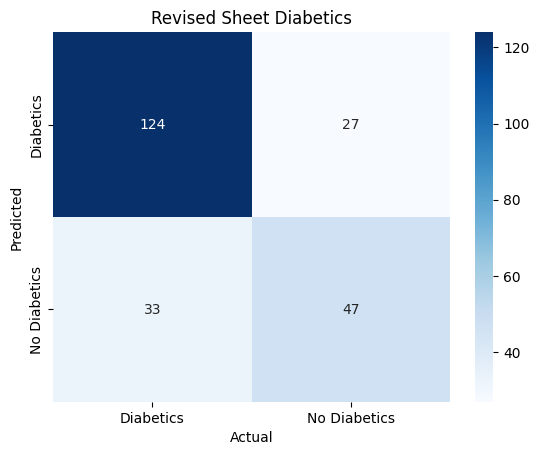

In [16]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

# Load data

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"


columns = ['Pregnancies', 'Glucose', 'BloodPressure',
           'SkinThickness', 'Insulin', 'BMI',
           'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names= columns)
df.head()

# As columns mentioned cannot be 0, mean was used in order to improve accuracy
col_with_zero = ['Glucose','BloodPressure',"SkinThickness",'Insulin','BMI']
for col in col_with_zero:
  df[col] =df[col].replace(0,df[col].mean())

# Correlation heatmap
correlation = df.corr()
print(correlation)
sns.heatmap(correlation,cmap = "Blues", fmt = ".2f", annot = True, )
plt.title("Correlation between features ")
plt.xlabel ("Outcome")
plt.ylabel("Features")
plt.show()

# Diabetes count bar chart
counts = df ["Outcome"] .value_counts()
plt.bar(["No Diabetics",'Diabetics'],counts, color = ["pink",'blue'], alpha = 0.5)
plt.title("Diabetics Count")
plt.ylabel("No of People")
plt.xlabel("Diabetics Status")
plt.show()


# Split data
X = df.drop (["Outcome"], axis = 1)
y = df["Outcome"]
X_training,X_testing,y_training,y_testing = train_test_split(X,y, random_state = 42,test_size= 0.3)
#print(X_testing.shape)
#print(X_training.shape)

# Scale data
scaler = StandardScaler()
x_train= scaler.fit_transform(X_training)
x_test = scaler.transform (X_testing)


# Train model
model = LogisticRegression()
model.fit(x_train,y_training)
prediction = model.predict(x_test)
#print(prediction)
#print(y_testing)

# Evaluate model
accuracy = accuracy_score(y_testing,prediction)
print('Accuracy % :',accuracy* 100)

# Confusion matrix
cn = confusion_matrix(y_testing,prediction)

sns.heatmap(cn,cmap= "Blues",annot = True,fmt = 'd', xticklabels= ["Diabetics",'No Diabetics' ], yticklabels= ["Diabetics",'No Diabetics' ])
plt.title ("Revised Sheet Diabetics")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()